# Corelation of Returns of BTC and ETH

This notebook looks at the Pearson Corelation of bitcoin and etherium daily returns (2017 Nov-2024 July).
Moreover, we looked at the corelation of daily returns with lagged time (i.e BTC price to ETH price $n$ days ago) and visa versa.

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
eth_df = pd.read_csv('/home/abil/Documents/CrypInf/data/ETH-USD (2017-2024).csv')
eth_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
1,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
3,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
4,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09


In [148]:
btc_df = pd.read_csv('/home/abil/Documents/CrypInf/data/BTC-USD (2014-2024).csv')
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [149]:
btc_df = btc_df[btc_df['Date'] >= '2017-11-10']

In [150]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
eth_df['Date'] = pd.to_datetime(eth_df['Date'])


In [151]:
btc_df.set_index('Date', inplace=True)
eth_df.set_index('Date', inplace=True)

merged_df = pd.merge(btc_df[['Close']], eth_df[['Close']], left_index=True, right_index=True, suffixes=('_btc', '_eth'))

# Calculate daily returns
merged_df['BTC Returns'] = merged_df['Close_btc'].pct_change()
merged_df['ETH Returns'] = merged_df['Close_eth'].pct_change()

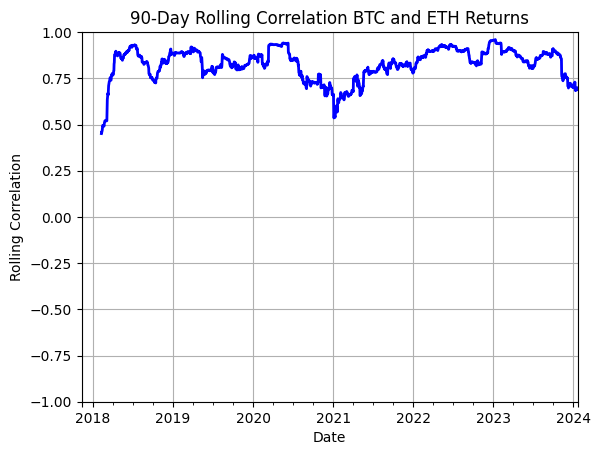

In [152]:
import seaborn as sns

# Calculate and display the correlation
window_length = 90
rolling_cor = merged_df['BTC Returns'].rolling(window=window_length).corr(merged_df['ETH Returns'])
rolling_cor.plot(title=f'{window_length}-Day Rolling Correlation BTC and ETH Returns', color='blue', lw=2)
plt.ylim(-1, 1)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()

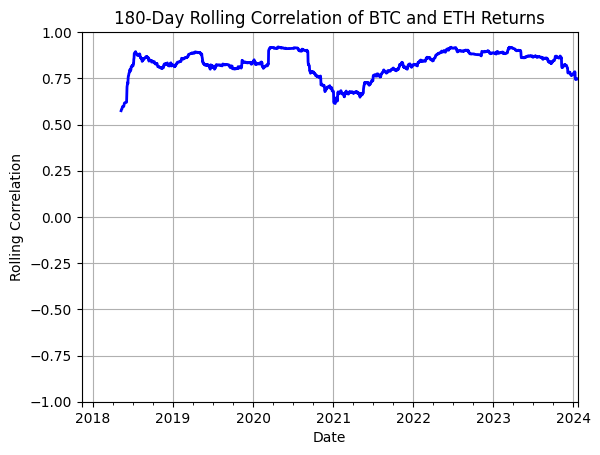

,Close_btc,Close_eth,BTC Returns,ETH Returns
Date,,,,
2017-11-10,6618.140137,299.252991,NaN,NaN
2017-11-11,6357.600098,314.681000,-0.039368,0.051555
2017-11-12,5950.069824,307.907990,-0.064101,-0.021523
2017-11-13,6559.490234,316.716003,0.102422,0.028606
2017-11-14,6635.750000,337.631012,0.011626,0.066037


In [153]:
# Calculate and display the correlation
window_length =180
rolling_cor = merged_df['BTC Returns'].rolling(window=window_length).corr(merged_df['ETH Returns'])
rolling_cor.plot(title=f'{window_length}-Day Rolling Correlation of BTC and ETH Returns', color='blue', lw=2)
plt.ylim(-1, 1)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()
merged_df.head()

/tmp/ipykernel_8011/88242413.py:63: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Lag (n)', orientation='vertical', fraction=0.02, pad=0.04)


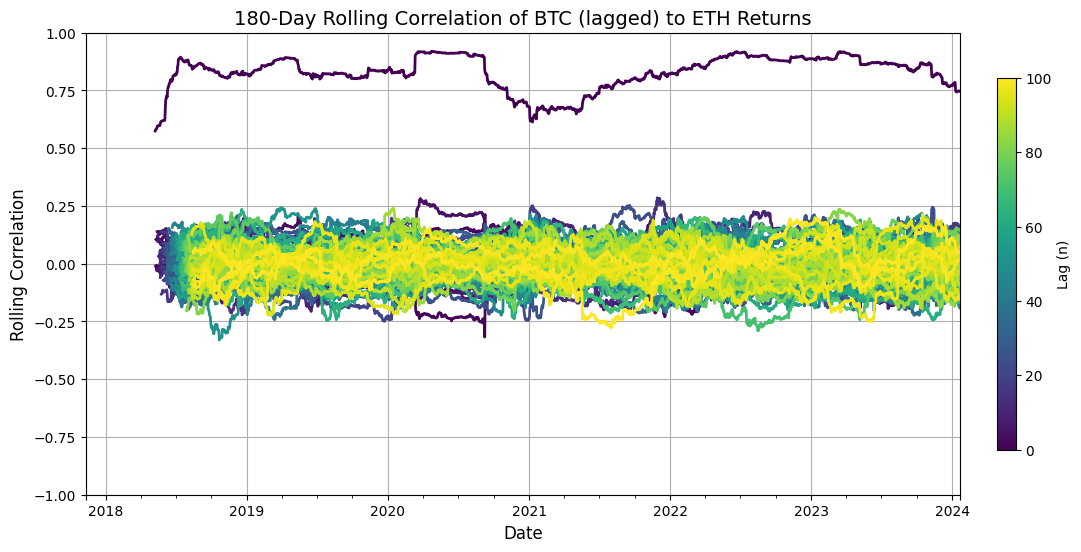

In [154]:
# Shift Ethereum returns by n days (example n = 3)
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def lagged_cor_eth(n, window_length):
    # make the preety color gradient
    cmap = cm.viridis  
    norm = mcolors.Normalize(vmin=0, vmax=n) 
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 

    plt.figure(figsize=(12, 6))

    for i in range(0, n+1):  
        merged_df['ETH Returns Shifted'] = merged_df['ETH Returns'].shift(i)

        # Drop rows with NaN values
        merged_df_clean = merged_df.dropna(subset=['BTC Returns', 'ETH Returns Shifted'])

        rolling_cor = merged_df_clean['BTC Returns'].rolling(window=window_length).corr(merged_df['ETH Returns Shifted'])

        color = cmap(i / n)

        # Plot the rolling correlation for the current n
        rolling_cor.plot(label=f'n = {i}', lw=2, color=color)


    plt.ylim(-1, 1) 
    plt.title(f'{window_length}-Day Rolling Correlation of BTC and ETH (lagged) Return', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Rolling Correlation', fontsize=12)
    plt.colorbar(sm, label='Lag (n)', orientation='vertical', fraction=0.02, pad=0.04)
    plt.grid(True)
    plt.show()

def lagged_cor_btc(n, window_length):
    # make the preety color gradient
    cmap = cm.viridis  
    norm = mcolors.Normalize(vmin=0, vmax=n) 
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 

    plt.figure(figsize=(12, 6))

    for i in range(0, n+1):  
        merged_df['BTC Returns Shifted'] = merged_df['BTC Returns'].shift(i)

        # Drop rows with NaN values
        merged_df_clean = merged_df.dropna(subset=['ETH Returns', 'BTC Returns Shifted'])

        rolling_cor = merged_df_clean['ETH Returns'].rolling(window=window_length).corr(merged_df['BTC Returns Shifted'])

        color = cmap(i / n)

        # Plot the rolling correlation for the current n
        rolling_cor.plot(label=f'n = {i}', lw=2, color=color)


    plt.ylim(-1, 1) 
    plt.title(f'{window_length}-Day Rolling Correlation of BTC (lagged) to ETH Returns', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Rolling Correlation', fontsize=12)
    plt.colorbar(sm, label='Lag (n)', orientation='vertical', fraction=0.02, pad=0.04)
    plt.grid(True)
    plt.show()
n = 100
window_length = 180
lagged_cor_btc(n, window_length)

/tmp/ipykernel_8011/88242413.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Lag (n)', orientation='vertical', fraction=0.02, pad=0.04)


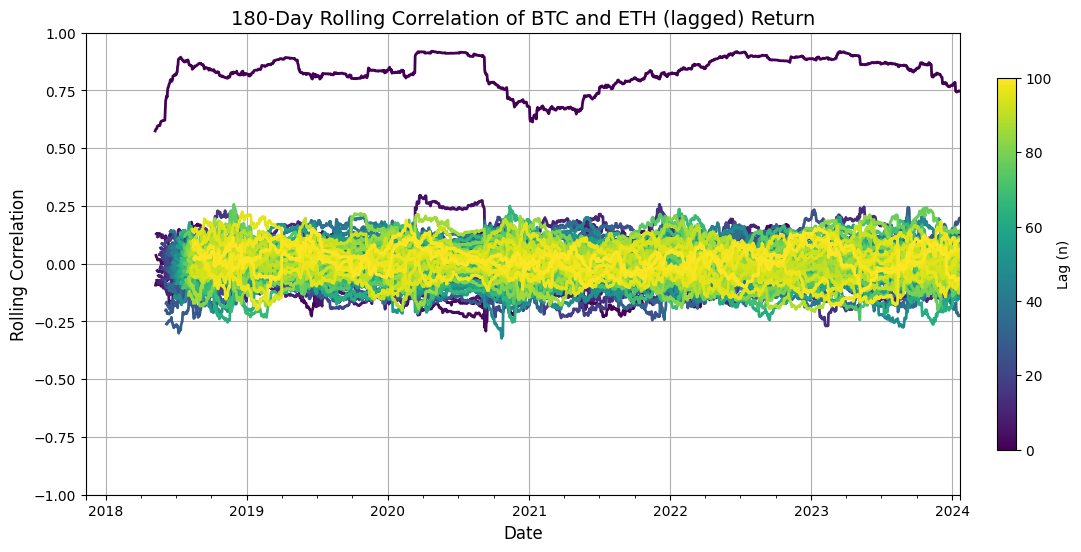

In [155]:
n = 100
window_length = 180
lagged_cor_eth(n, window_length)

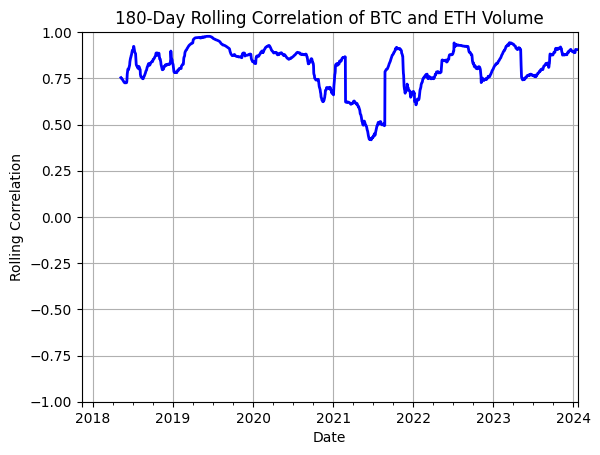

In [156]:
window_length =180

merged_df = pd.merge(btc_df[['Volume']], eth_df[['Volume']], left_index=True, right_index=True, suffixes=('_btc', '_eth'))

rolling_cor = merged_df['Volume_btc'].rolling(window=window_length).corr(merged_df['Volume_eth'])
rolling_cor.plot(title=f'{window_length}-Day Rolling Correlation of BTC and ETH Volume', color='blue', lw=2)
plt.ylim(-1, 1)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()

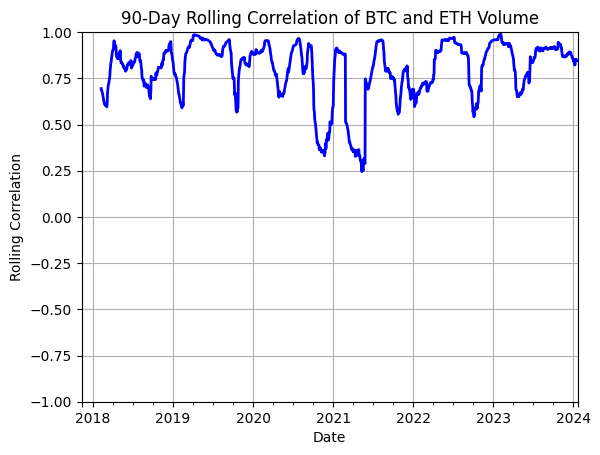

In [157]:
window_length =90

merged_df = pd.merge(btc_df[['Volume']], eth_df[['Volume']], left_index=True, right_index=True, suffixes=('_btc', '_eth'))

rolling_cor = merged_df['Volume_btc'].rolling(window=window_length).corr(merged_df['Volume_eth'])
rolling_cor.plot(title=f'{window_length}-Day Rolling Correlation of BTC and ETH Volume', color='blue', lw=2)
plt.ylim(-1, 1)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()